# **`LOGISTIC REGRESION`**

### `IMPORTING LIBRARIES`

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import nltk
import pickle
import string
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix, classification_report
from keras_preprocessing.sequence import pad_sequences
from keras_preprocessing.text import Tokenizer
import seaborn as sns

In [4]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### `VISUALIZING THE DATASET`

In [5]:
dataset=pd.read_csv('1.6m.csv',encoding='ISO-8859-1',names=["label", "ids", "date", "flag", "user", "tweet"])

In [6]:
dataset.head()

,label,ids,date,flag,user,tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [7]:
dataset=dataset.drop([ "ids", "date", "flag", "user"],axis=1)

In [8]:
dataset.head(10)

,label,tweet
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."
5,0,@Kwesidei not the whole crew
6,0,Need a hug
7,0,@LOLTrish hey long time no see! Yes.. Rains a...
8,0,@Tatiana_K nope they didn't have it
9,0,@twittera que me muera ?


In [9]:
dataset.info()
print(len(dataset))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   label   1600000 non-null  int64 
 1   tweet   1600000 non-null  object
dtypes: int64(1), object(1)
memory usage: 24.4+ MB
1600000


In [10]:
dataset['label'].unique()

array([0, 4], dtype=int64)

### `PREPROCESSING DATA`

In [11]:
dataset_pos=dataset[dataset['label']==4]
dataset_neg=dataset[dataset['label']==0]

In [12]:
dataset_pos.head()

,label,tweet
800000,4,I LOVE @Health4UandPets u guys r the best!!
800001,4,im meeting up with one of my besties tonight! ...
800002,4,"@DaRealSunisaKim Thanks for the Twitter add, S..."
800003,4,Being sick can be really cheap when it hurts t...
800004,4,@LovesBrooklyn2 he has that effect on everyone


In [13]:
dataset_neg.head()

,label,tweet
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [14]:
dataset_pos=dataset_pos[:20000]
dataset_neg=dataset_neg[:20000]

In [15]:
dataset_pos.tail()

,label,tweet
819995,4,We just met some awesome people at T.G.I Fridays
819996,4,oh my goodness . my feet are the most sensitiv...
819997,4,@hey_angy hahaha
819998,4,@Lamartian30 Pfft school is koo. I'm ranked 2n...
819999,4,"stuffed. working out, shower,movie night, thn ..."


In [16]:
dataset_neg.tail()

,label,tweet
19995,0,"Not much time off this weekend, work trip to M..."
19996,0,One more day of holidays
19997,0,feeling so down right now .. i hate you DAMN H...
19998,0,"geez,i hv to READ the whole book of personalit..."
19999,0,I threw my sign at donnie and he bent over to ...


In [17]:
dataset=pd.concat([dataset_pos,dataset_neg])

In [18]:
dataset.head()

,label,tweet
800000,4,I LOVE @Health4UandPets u guys r the best!!
800001,4,im meeting up with one of my besties tonight! ...
800002,4,"@DaRealSunisaKim Thanks for the Twitter add, S..."
800003,4,Being sick can be really cheap when it hurts t...
800004,4,@LovesBrooklyn2 he has that effect on everyone


In [19]:
dataset=dataset.sample(frac=1)

In [20]:
dataset.head()

,label,tweet
817167,4,@TheDanielRyan I personally like the dog being...
14326,0,@livy_rose_y i have my confirmation wednesday ...
1592,0,@jillglavan soooo disappointed your T.I. party...
17953,0,wondering why his tweets don't find their way ...
818162,4,@danielleshiner Yes mam! But we already talked...


In [21]:
stop_words=stopwords.words('english')
punctuation_list=list(string.punctuation)

In [22]:
def preprocess(text):
  text=str(text).lower()
  text=re.sub(r'https?:\/\/\S+', '', text)
  text=re.sub(r'{link}', '', text)
  text=re.sub(r'&[a-z]+;', '', text)
  text=re.sub(r"[^a-z\s\(\-:\)\\\/\];='#]", '', text)
  text=re.sub(r'@mention', '', text)
  text=re.sub(r'#','',text)
  words=[w for w in text.split() if w not in stop_words]
  words=[PorterStemmer().stem(w) for w in words]
  words=[w for w in words if w not in punctuation_list]
  return words
  


In [23]:
dataset.tweet=dataset.tweet.apply(lambda x: preprocess(x))

In [24]:
dataset.head(20)

,label,tweet
817167,4,"[thedanielryan, person, like, dog, bed, feel, ..."
14326,0,"[livyrosey, confirm, wednesday, serious, soooo..."
1592,0,"[jillglavan, soooo, disappoint, ti, parti, lea..."
17953,0,"[wonder, tweet, find, way, asot, like]"
818162,4,"[danielleshin, ye, mam, alreadi, talk, hope, k..."
6415,0,"[search, job, board, new, excit, opportun, tur..."
809780,4,"[cuzzinjeff, may, come, tmw, night]"
815692,4,"[killerloop, feel, nice, idea, build, use, ado..."
800102,4,"[missnappyboy, ur, home, ohhh, nkow, lexington..."
809154,4,"[slept, morn, bad, listen, song]"


In [25]:
dataset.tail(20)

,label,tweet
7753,0,"[start, worri, java, exam]"
801138,4,"[ad, realli, someth, like, exchang, w/, maikwl..."
10825,0,"[hate, fact, there', edit, twitter]"
3507,0,"[immm, sooooo, lowwww]"
18728,0,"[stupid, bank, chequ, credit, sooner, maaaaaan]"
15662,0,"[broke, present, go, give, daughter, bday]"
810385,4,"[dbruzek, go, faster, turn, music, ps, welcom,..."
11570,0,"[cannot, believ, back, uni, tomoz, want, week,..."
14916,0,"[tire, day]"
812802,4,"[watch, oprah, show, talk, twitter]"


## `TESTING AND TRAINING DATA`

In [26]:
x=dataset['tweet']
y=dataset['label']

In [27]:
x

817167    [thedanielryan, person, like, dog, bed, feel, ...
14326     [livyrosey, confirm, wednesday, serious, soooo...
1592      [jillglavan, soooo, disappoint, ti, parti, lea...
17953                [wonder, tweet, find, way, asot, like]
818162    [danielleshin, ye, mam, alreadi, talk, hope, k...
                                ...                        
813633       [rewindbutton, i'm, gonna, tell, teacher, hit]
12813     [gxsaurav, blu, nice, kinda, unstabl, tbh, bes...
818990    [vuhhnessa, awh, that, fair, even, one, backup...
4095      [fantast, week, end, --, plumb, --, work, fit,...
816277                     [home, wait, cousin, come, hang]
Name: tweet, Length: 40000, dtype: object

In [28]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.05,random_state=1)

In [29]:
vocabulary_size = 5000
count_vector = CountVectorizer(max_features=vocabulary_size,
                                preprocessor=lambda x: x,
                               tokenizer=lambda x: x) 
x_train = count_vector.fit_transform(x_train).toarray()
x_test = count_vector.transform(x_test).toarray()

In [30]:
max_words = 5000
max_len=50

def tokenize_pad_sequences(text):
    tokenizer = Tokenizer(num_words=max_words, lower=True, split=' ')
    tokenizer.fit_on_texts(text)
    X = tokenizer.texts_to_sequences(text)
    X = pad_sequences(X, padding='post', maxlen=max_len)
    return X, tokenizer

print('Before Tokenization & Padding \n', dataset['tweet'][0])
X, tokenizer = tokenize_pad_sequences(dataset['tweet'])
print('After Tokenization & Padding \n', X[0])

Before Tokenization & Padding 
 ['switchfoot', 'awww', "that'", 'bummer', 'shoulda', 'got', 'david', 'carr', 'third', 'day', ';d']
After Tokenization & Padding 
 [ 307    7  249   59   18    2 2339  249   65 1178  710    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0]


In [31]:
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open('tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

#### `FUNCTION FOR DETERMING ACCURACY`

In [32]:
def model_Evaluate(model):
# Predict values for Test dataset
    y_pred = model.predict(x_test)
    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))
    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)
    categories = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
    labels = [f'{v1}n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
    xticklabels = categories, yticklabels = categories)
    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

## `LOGISTIC REGRESSION`

              precision    recall  f1-score   support

           0       0.76      0.69      0.72      1020
           4       0.71      0.78      0.74       980

    accuracy                           0.73      2000
   macro avg       0.73      0.73      0.73      2000
weighted avg       0.73      0.73      0.73      2000



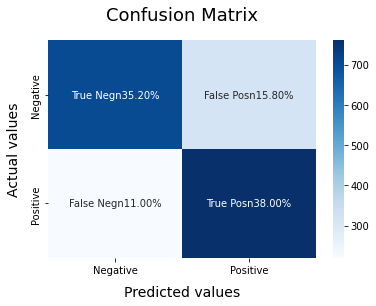

In [33]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(C=2,max_iter=1000,n_jobs=-1)
lr.fit(x_train,y_train)
model_Evaluate(lr)
y_pred3=lr.predict(x_test)

In [34]:
filename='final_lr_model.sav'
pickle.dump(lr,open(filename,'wb'))

loaded_model=pickle.load(open(filename,'rb'))
result=loaded_model.score(x_test,y_test)

In [35]:
result

0.732